## mJy to Luminosity

In [163]:
import pandas as pd
import numpy as np
from astropy.cosmology import Planck18
import astropy.units as u

df = pd.read_csv("/Users/Djslime07/OpticalProperties/S_band_data.csv")

flux_cgs = df['RMS'] * 1e-26 
d_L = Planck18.luminosity_distance(df['Redshift']).cgs.value 
L_nu = 4 * np.pi * d_L**2 * flux_cgs * (1 + df['Redshift'])
df['RMSluminosity (erg/s/Hz)'] = L_nu


df.to_csv('/Users/Djslime07/OpticalProperties/S_band_data.csv', index=False)

## Optical Light Curves

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

filter_colors = {
    'atlaso': "#8D0E0E",
    'atlasc': "#6CA64F",
    'ztfi': 'orange',
    'ztfg': 'green',
    'ztfr': 'red',
    'sdssg': "#06D4DF",
    'sdssi': "#DF9E06",
    'sdssr': "#DF4B06",
    'sdssz': "#A4190C",
    'GPC2': "#630800",
}

data_dir = "/Users/Djslime07/OpticalProperties/light_curve_data"
csv_files = glob.glob(os.path.join(data_dir, "*_photometry.csv"))

info_file = "/Users/Djslime07/OpticalProperties/data.csv" 
info_df = pd.read_csv(info_file)
ztf_to_iauid = dict(zip(info_df['name'], info_df['IAUID']))

for file in csv_files:
    basename = os.path.basename(file)
    ztf_name = basename.replace('_photometry.csv', '')
    
    object_label = ztf_to_iauid.get(ztf_name, ztf_name)

    df = pd.read_csv(file)
    plt.figure(figsize=(10, 6))

    for filt in df['filter'].dropna().unique():
        df_filt = df[df['filter'] == filt]
        color = filter_colors.get(filt, 'gray')

        detections = df_filt[df_filt['mag'].notnull()]
        plt.errorbar(detections['mjd'], detections['mag'], yerr=detections['magerr'],
                     fmt='o', color=color, label=f'{filt}', capsize=2)

    plt.gca().invert_yaxis()
    plt.xlabel("MJD")
    plt.ylabel("Magnitude")
    plt.title(f"{object_label} Multiband Lightcurve")
    plt.legend(loc='best', fontsize='small')
    plt.grid(True)
    plt.tight_layout()

    output_filename = f"{object_label}_lightcurve.pdf"
    plt.savefig(f'/Users/Djslime07/OpticalProperties/light_curves/{output_filename}', format='pdf', bbox_inches='tight')
    plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.cosmology import Planck18 as cosmo 

filter_colors = {'ztfr': 'red'}

data_dir = "/Users/Djslime07/OpticalProperties/light_curve_data"
info_file = "/Users/Djslime07/OpticalProperties/data.csv"

info_df = pd.read_csv(info_file)

selected_objects = ['SN2018hon', 'SN2020adhh', 'SN2023rky']
marker_styles = {
    'SN2018hon': 'o',   
    'SN2020adhh': 's',  
    'SN2023rky': '^'    
}

plt.figure(figsize=(10, 6))

for sn_name in selected_objects:
    row = info_df.loc[info_df['IAUID'] == sn_name]
    if row.empty:
        print(f"Warning: {sn_name} not found in info file.")
        continue

    ztf_name = row['name'].values[0]
    z = row['redshift'].values[0]

    DL = cosmo.luminosity_distance(z).to('pc').value
    distance_modulus = 5 * np.log10(DL / 10)

    file_path = os.path.join(data_dir, f"{ztf_name}_photometry.csv")
    if not os.path.exists(file_path):
        print(f"File not found for {sn_name}: {file_path}")
        continue

    df = pd.read_csv(file_path)
    df_ztfr = df[df['filter'] == 'ztfr']
    if df_ztfr.empty:
        print(f"No ztfr data for {sn_name}")
        continue

    df_ztfr['abs_mag'] = df_ztfr['mag'] - distance_modulus

    detections = df_ztfr[df_ztfr['abs_mag'].notnull()]
    plt.errorbar(
        detections['mjd'], detections['abs_mag'], yerr=detections['magerr'],
        fmt=marker_styles.get(sn_name, 'o'),
        color=filter_colors['ztfr'],
        label=sn_name,
        capsize=2,
        markersize=6,
        linestyle='none'
    )

plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("Absolute Magnitude")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()

output_path = "/Users/Djslime07/OpticalProperties/light_curves/r_abs_lightcurves.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"Saved absolute magnitude plot to: {output_path}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.cosmology import Planck18 as cosmo  

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "text.usetex": True,  
})

filter_colors = {'ztfr': 'red'}

data_dir = "/Users/Djslime07/OpticalProperties/light_curve_data"
info_file = "/Users/Djslime07/OpticalProperties/data.csv"

info_df = pd.read_csv(info_file)

selected_objects = ['SN2018hon', 'SN2020adhh', 'SN2023rky']
plot_styles = {
    'SN2018hon': {'marker': 'o', 'color': '#E74C3C'},   
    'SN2020adhh': {'marker': 's', 'color': "#BC1A1A"},  
    'SN2023rky': {'marker': '^', 'color': "#500000"}    
}

plt.figure(figsize=(10, 6))

for sn_name in selected_objects:
    row = info_df.loc[info_df['IAUID'] == sn_name]
    if row.empty:
        print(f"Warning: {sn_name} not found in info file.")
        continue

    ztf_name = row['name'].values[0]
    z = row['redshift'].values[0]

    DL = cosmo.luminosity_distance(z).to('pc').value
    distance_modulus = 5 * np.log10(DL / 10)

    file_path = os.path.join(data_dir, f"{ztf_name}_photometry.csv")
    if not os.path.exists(file_path):
        print(f"File not found for {sn_name}: {file_path}")
        continue

    df = pd.read_csv(file_path)
    df_ztfr = df[df['filter'] == 'ztfr']
    if df_ztfr.empty:
        print(f"No ztfr data for {sn_name}")
        continue

    df_ztfr['abs_mag'] = df_ztfr['mag'] - distance_modulus

    first_mjd = df_ztfr['mjd'].min()
    df_ztfr['dt'] = df_ztfr['mjd'] - first_mjd

    tmin, tmax = df_ztfr['mjd'].min(), df_ztfr['mjd'].max()
    print(f"{sn_name}: MJD range {tmin:.6f} - {tmax:.6f}  (Δt = {tmax - tmin:.2f} days)")

    detections = df_ztfr[df_ztfr['abs_mag'].notnull()]
    style = plot_styles.get(sn_name, {'marker': 'o', 'color': 'gray'})

    plt.errorbar(
        detections['dt'], detections['abs_mag'], yerr=detections['magerr'],
        fmt=style['marker'],
        color=style['color'],
        label=f'{sn_name}',
        capsize=2,
        markersize=6,
        linestyle='none'
    )

plt.gca().invert_yaxis()
plt.xlabel(r"Days Since First Observation $(\Delta t)$")
plt.ylabel("Absolute Magnitude (m - DM)")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()

output_path = "/Users/Djslime07/OpticalProperties/light_curves/ztfr_abs_lightcurves_dt_firstobs.pdf"
output_path2 = "/Users/Djslime07/OpticalProperties/light_curves/ztfr_abs_lightcurves_dt_firstobs.png"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.savefig(output_path2, format='png', bbox_inches='tight',dpi=1600)
plt.show()

print(f"Saved normalized absolute magnitude plot to: {output_path}")

## Spectras

In [ ]:
import os
import glob
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt

csv_path = 'data.csv'
df = pd.read_csv(csv_path, na_values=['-', ''])

iauid_to_data = df.set_index('IAUID')[['name', 'redshift', 'type']].dropna().to_dict('index')

spectra_dir = '/Users/Djslime07/OpticalProperties/spectra_data'
ascii_files = glob.glob(os.path.join(spectra_dir, '*.ascii'))

for ascii_file in ascii_files:
    filename = os.path.basename(ascii_file)
    parts = filename.split('_')
    iau_raw = parts[1]
    date = parts[2]  
    iauid = 'SN' + iau_raw

    print(f"Processing: {iauid}")

    if iauid not in iauid_to_data:
        print(f"Skipping {filename}: no redshift found for {iauid}")
        continue

    ztf_name = iauid_to_data[iauid]['name']
    z = iauid_to_data[iauid]['redshift']
    sn_type = iauid_to_data[iauid]['type']

    try:
        data = ascii.read(ascii_file)
        wavelength = data['col1']
        flux = data['col2']
        print("Data read successfully!")
    except Exception as e:
        print(f"Failed to read {filename}: {e}")
        continue

    wavelength_rest = wavelength / (1 + z)
    fig, ax_rest = plt.subplots(figsize=(10, 5))
    ax_rest.plot(wavelength_rest, flux, color='black')
    ax_rest.set_xlabel("Rest Wavelength (Å)")
    ax_rest.set_ylabel("Flux (erg/s/cm²/Å)")
    ax_rest.grid(True)

    def rest_to_obs(x): return x * (1 + z)
    def obs_to_rest(x): return x / (1 + z)
    ax_obs = ax_rest.secondary_xaxis('top', functions=(rest_to_obs, obs_to_rest))
    ax_obs.set_xlabel("Observed Wavelength (Å)")

    lines = {
        'H-alpha': {'wavelength': 6562.79, 'color': 'red', 'legend': r'H$\alpha$'},
        'H-beta': {'wavelength': 4861.35, 'color': 'blue', 'legend': r'H$\beta$'},
        'Helium': {'wavelength': 5875.00, 'color': 'gold', 'legend': r'He I'},
    }

    for label, line in lines.items():
        rest_wave = line['wavelength']
        obs_wave = rest_wave * (1 + z)
        legend_label = f"{line['legend']} (rest: {rest_wave:.1f} Å, obs: {obs_wave:.1f} Å)"

        ax_rest.axvline(
        x=rest_wave,
        color=line['color'],
        linestyle='--',
        linewidth=1,
        label=legend_label
        )


    ax_rest.legend()
    plt.title(f'{iauid} | {sn_type} | z = {z:.4f} | Date = {date}')
    plt.tight_layout()
    plt.savefig(f'/Users/Djslime07/OpticalProperties/spectras/{iauid}_spectra.pdf', format='pdf', bbox_inches='tight')
    plt.close()

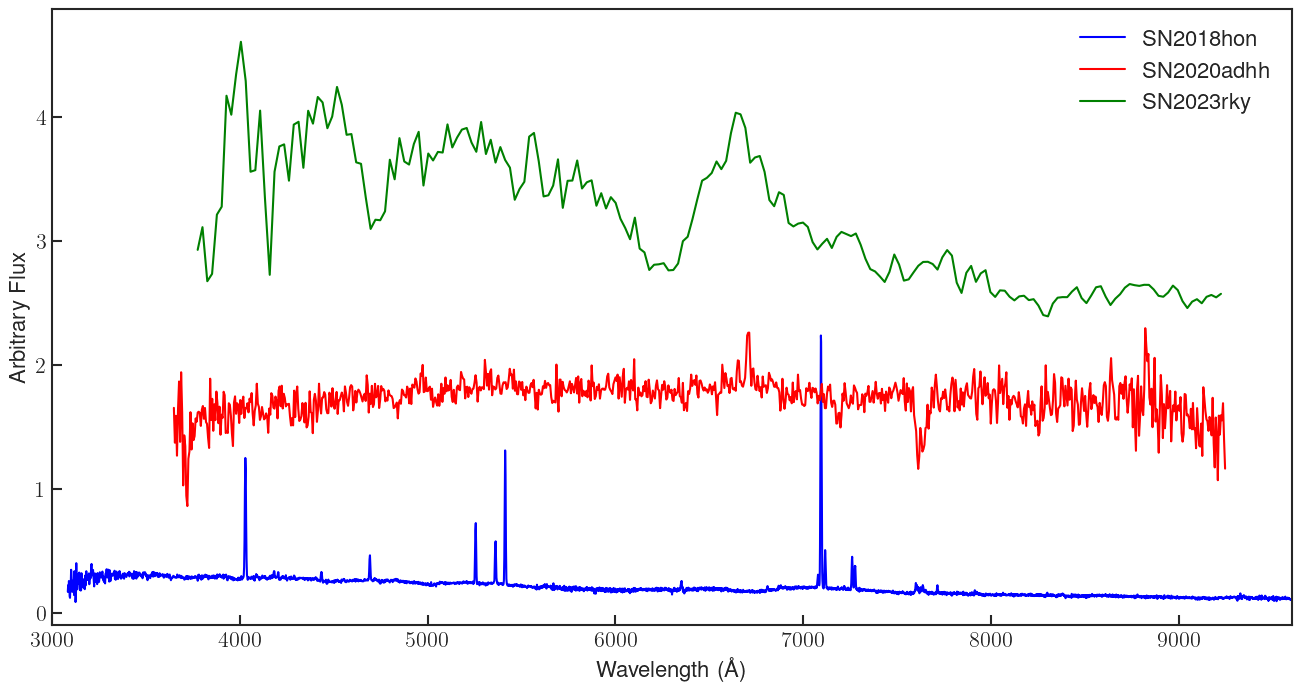

In [281]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "text.usetex": True,  
})

file1 = "/Users/Djslime07/OpticalProperties/spectra_data/tns_2018hon_2018-12-04_05-01-01_Keck1_LRIS_ZTF.ascii"
data1 = np.loadtxt(file1)
wavelength1 = data1[:, 0]
flux1 = data1[:, 1]
flux_norm1 = flux1 * 1e15

file2 = "/Users/Djslime07/OpticalProperties/spectra_data/tns_2020adhh_2021-01-05_01-10-18_ESO-NTT_EFOSC2-NTT_ePESSTO+.ascii"
data2 = np.loadtxt(file2)
wavelength2 = data2[:, 0]
flux2 = data2[:, 1]
flux_norm2 = flux2 * 1e16

file3 = "/Users/Djslime07/OpticalProperties/spectra_data/tns_2023rky_2023-09-06_10-24-36.968817_P60_SEDM_ZTF.ascii"
data3 = np.loadtxt(file3)
wavelength3 = data3[:, 0]
flux3 = data3[:, 1]
flux_norm3 = flux3 * 1e16

offset1 = 0
offset2 = 1   
offset3 = 2   

plt.figure(figsize=(16, 8))
plt.plot(wavelength1, flux_norm1 + offset1, color='blue', label='SN2018hon')
plt.plot(wavelength2, flux_norm2 + offset2, color='red', label='SN2020adhh')
plt.plot(wavelength3, flux_norm3 + offset3, color='green', label='SN2023rky')

plt.xlim(3000, 9600)
plt.ylim(-0.1, offset3 + max(flux_norm3)*1.1)

plt.xlabel('Wavelength (Å)')
plt.ylabel('Arbitrary Flux')
plt.legend()
plt.savefig(f'/Users/Djslime07/OpticalProperties/spectras/sequence_spectra_v1.pdf', format='pdf', bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "text.usetex": True,  
})

file1 = "/Users/Djslime07/OpticalProperties/spectra_data/tns_2018hon_2018-12-04_05-01-01_Keck1_LRIS_ZTF.ascii"
data1 = np.loadtxt(file1)
wavelength1 = data1[:, 0]
flux1 = data1[:, 1]
flux_norm1 = flux1 * 1e15

file2 = "/Users/Djslime07/OpticalProperties/spectra_data/tns_2020adhh_2021-01-05_01-10-18_ESO-NTT_EFOSC2-NTT_ePESSTO+.ascii"
data2 = np.loadtxt(file2)
wavelength2 = data2[:, 0]
flux2 = data2[:, 1]
flux_norm2 = flux2 * 1e16

file3 = "/Users/Djslime07/OpticalProperties/spectra_data/tns_2023rky_2023-09-06_10-24-36.968817_P60_SEDM_ZTF.ascii"
data3 = np.loadtxt(file3)
wavelength3 = data3[:, 0]
flux3 = data3[:, 1]
flux_norm3 = flux3 * 1e16

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

def clean_axes(ax, keep_bottom=False):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if not keep_bottom:
        ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False, bottom=keep_bottom, labelleft=False, labelbottom=keep_bottom)

line1, = axes[0].plot(wavelength1, flux_norm1, color='blue', label='SN2018hon')
axes[0].set_xlim(3000, 9600)
axes[0].set_ylim(0.1, 0.4)
clean_axes(axes[0])

line2, = axes[1].plot(wavelength2, flux_norm2, color='red', label='SN2020adhh')
axes[1].set_xlim(3500, 9100)
axes[1].set_ylim(0.1, 1)
clean_axes(axes[1])

line3, = axes[2].plot(wavelength3, flux_norm3, color='green', label='SN2023rky')
axes[2].set_xlim(4000, 9300)
axes[2].set_ylim(0.3, 2.6)
axes[2].set_xlabel('Wavelength (Å)', fontsize=20, family='Helvetica')
clean_axes(axes[2], keep_bottom=True)

plt.tight_layout()

bottom_fig = axes[2].get_position().y0
top_fig = axes[0].get_position().y1
left_fig = axes[0].get_position().x0 - 0.02
right_fig = axes[2].get_position().x1 + 0.01  

fig.lines.extend([
    plt.Line2D([left_fig, left_fig], [bottom_fig, top_fig], transform=fig.transFigure, color='black', linewidth=1.2),
    plt.Line2D([right_fig, right_fig], [bottom_fig, top_fig], transform=fig.transFigure, color='black', linewidth=1.2)
])

fig.lines.extend([
    plt.Line2D([left_fig, right_fig], [bottom_fig, bottom_fig], transform=fig.transFigure, color='black', linewidth=1.2),
    plt.Line2D([left_fig, right_fig], [top_fig, top_fig], transform=fig.transFigure, color='black', linewidth=1.2)
])

fig.text(left_fig - 0.02, (bottom_fig + top_fig)/2, 'Arbitrary Flux',
         va='center', rotation='vertical', fontsize=20, family='Helvetica')

fig.legend(
    handles=[line1, line2, line3],
    labels=['SN2018hon', 'SN2020adhh', 'SN2023rky'],
    loc='upper right',
    bbox_to_anchor=(0.99, 0.98),  
    fontsize=16,
    frameon=True,
    framealpha=1,
    edgecolor='black',
    facecolor='white',
    prop={'family':'Helvetica'}
)

plt.savefig(f'/Users/Djslime07/OpticalProperties/spectras/sequence_spectrav2.pdf', format='pdf', bbox_inches='tight')

## Binned Time Periods

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

df = pd.read_csv('/Users/Djslime07/OpticalProperties/25A-386 Project Data - Light Curve Data.csv')

classification_styles = {
    'Archival Ibc': {'color': '#04e3ff', 'marker': 'o'},
    'VLASS Ibc': {'color': '#04e3ff', 'marker': 's'},

    'Archival II': {'color': "#5cff04", 'marker': 'o'},
    'VLASS II': {'color': '#5cff04', 'marker': 's'},

    'Archival IIn': {'color': '#660099', 'marker': 'o'},
    'VLASS IIn': {'color': '#660099', 'marker': 's'},

    'new_VLASS': {'color': '#fb19dd', 'marker': 's'},
    '25A-386 Observations': {'color': '#fb19dd', 'marker': '*'},
    '25A-386 upper': {'color': '#fb19dd', 'marker': 'v'},
    'ASKAP Observations': {'color': '#fb19dd', 'marker': 'P'},

    'Ib/c average': {'color': "#7ad3df", 'marker': 's'},
    'II average': {'color': "#a0f571", 'marker': 's'},
    'IIn average': {'color': "#7B4596", 'marker': 's'},

    'grb30': {'color': 'black', 'linestyle': '-', 'marker': 'o'},
    'grb60': {'color': "black", 'linestyle': '--', 'marker': 'o'},
    'grb90': {'color': "black", 'linestyle': ':', 'marker': 'o'},
}

label_these = [
    'SN2024ehs', 'SN2019pqo', 'SN2021bmf', 'SN2019wqq',
    'PTF11qcj', 'SN2004c', 'SN2003bg', 'SN2004dk', 'SN2016coi',
    '1986J', 'SN2012au', '1998bw', 'SN2012ap', 'SN2020adhh', 'SN2009bb'
]

fig, ax = plt.subplots(figsize=(20, 12))
texts = []

for sn, group in df.groupby('SN'):
    group_sorted = group.sort_values(by='dt (years)')
    group_sorted = group_sorted[group_sorted['dt (years)'] >= 0]
    if group_sorted.empty:
        continue

    line_cls = str(group_sorted.iloc[0]['classification'])
    line_style = classification_styles.get(line_cls, {'color': 'gray', 'marker': 'o'})

    if line_cls in ["grb30", "grb60", "grb90"]:
        ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle=line_style.get('linestyle', '-'),
                color=line_style['color'],
                linewidth=4,
                zorder=2)
    elif line_cls in ["IIn average", "Ib/c average", "II average"]:
        group_sorted['Luminosity_upper'] = group_sorted['Luminosity'] * 2
        group_sorted['Luminosity_lower'] = group_sorted['Luminosity'] * 0.5

        ax.fill_between(group_sorted['dt (years)'],
                        group_sorted['Luminosity_lower'],
                        group_sorted['Luminosity_upper'],
                        color=line_style['color'],
                        alpha=0.3,
                        zorder=0)
    else:
        if sn in label_these:
            ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                    linestyle='-', color='black', linewidth=4.0, alpha=0.5, zorder=0)

        ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle='-', color=line_style['color'], linewidth=2.2, alpha=0.9, zorder=1)

    if line_cls not in ["IIn average", "Ib/c average", "II average", "grb30", "grb60", "grb90"]:
        for _, row in group_sorted.iterrows():
            cls = str(row['classification'])
            status = row['status']
            style = classification_styles.get(cls, {'color': 'gray', 'marker': 'o'})
            if status == 'real':
                marker = style['marker']
                ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker=marker,
                   s=70, edgecolor='black', linewidth=1.2, zorder=2)
            elif status == 'upper':
                ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker='*',
                   s=120, edgecolor='black', linewidth=1.2, zorder=2)
                ax.annotate(
                    '', 
                    xy=(row['dt (years)'], row['Luminosity'] * 0.8), 
                    xytext=(row['dt (years)'], row['Luminosity']),   
                    arrowprops=dict(facecolor='#fb19dd', edgecolor='black', arrowstyle='-|>', lw=1, shrinkA=0, shrinkB=0),
                    annotation_clip=False
        )

    if sn in label_these and line_cls != "IIn average":
        final_row = group_sorted.iloc[-1]
        short_label = re.sub(r'^SN20(\d{2})', r'\1', sn)

        sn_type = final_row.get('type', '') 
        if pd.isna(sn_type):
            sn_type = ''
        else:
            sn_type = f"({sn_type})"

        label_text = f"{short_label}{sn_type}"

        x_offset = final_row['dt (years)'] * 1.04
        y_coord = final_row['Luminosity']
        if sn == 'SN2009bb':
            y_coord *= 0.9
        if sn == '1998bw':
            y_coord *= 0.8; x_offset = final_row['dt (years)'] 
        if sn == 'SN2012au':
            y_coord *= 1
        if sn =='SN2020adhh':
            y_coord *= 1.2;  x_offset = final_row['dt (years)'] * 0.95

        text = ax.text(x_offset, y_coord, label_text,
                   fontsize=14, color=line_style['color'],
                   ha='left', va='center')
        texts.append(text)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Archival Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),   
              
    Line2D([0], [0], marker='o', color='w', label='Archival Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='s', color='w', label='VLASS Observations (Targets)',
           markerfacecolor='#fb19dd', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='*', color='w', label='VLASS 25A-386 Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'), 
    Line2D([0], [0], marker='P', color='w', label='ASKAP Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'), 

    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type Ib/Ic',
           markerfacecolor='#7ad3df', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type II',
           markerfacecolor='#a0f571', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type IIn',
           markerfacecolor='#7B4596', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], color='black', lw=3, linestyle='-', label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 30^\circ$)',),
    Line2D([0], [0], color="black", lw=3, linestyle='--', label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 60^\circ$)',),
    Line2D([0], [0], color='black', lw=3, linestyle=':', label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 90^\circ$)',),
]


ax.legend(
    handles=legend_elements,
    loc='lower left',
    fontsize=15,
    frameon=True,
    framealpha=0.95,
    ncol=3,          
    handletextpad=0.5,
    columnspacing=1.0
)

ax.set_xscale('log')
ax.set_yscale('log')
xmax = df['dt (years)'].max()
ax.set_xlim(right=xmax * 2)
ax.set_xlabel('Time Since Explosion (years)', fontsize=20, labelpad=12)
ax.set_ylabel('Luminosity (erg/s/Hz)', fontsize=20, labelpad=12)
plt.tick_params(axis='both', which='major', labelsize=18)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.5)
legend.get_frame().set_edgecolor('black')

ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))

ax.tick_params(axis='both', which='minor', length=10, width=1.2)
plt.subplots_adjust(bottom=0.1, left=0.1, right=0.95, top=0.95)
plt.savefig('luminosity_plot.pdf', format='pdf', bbox_inches='tight')

## H-Rich Plot

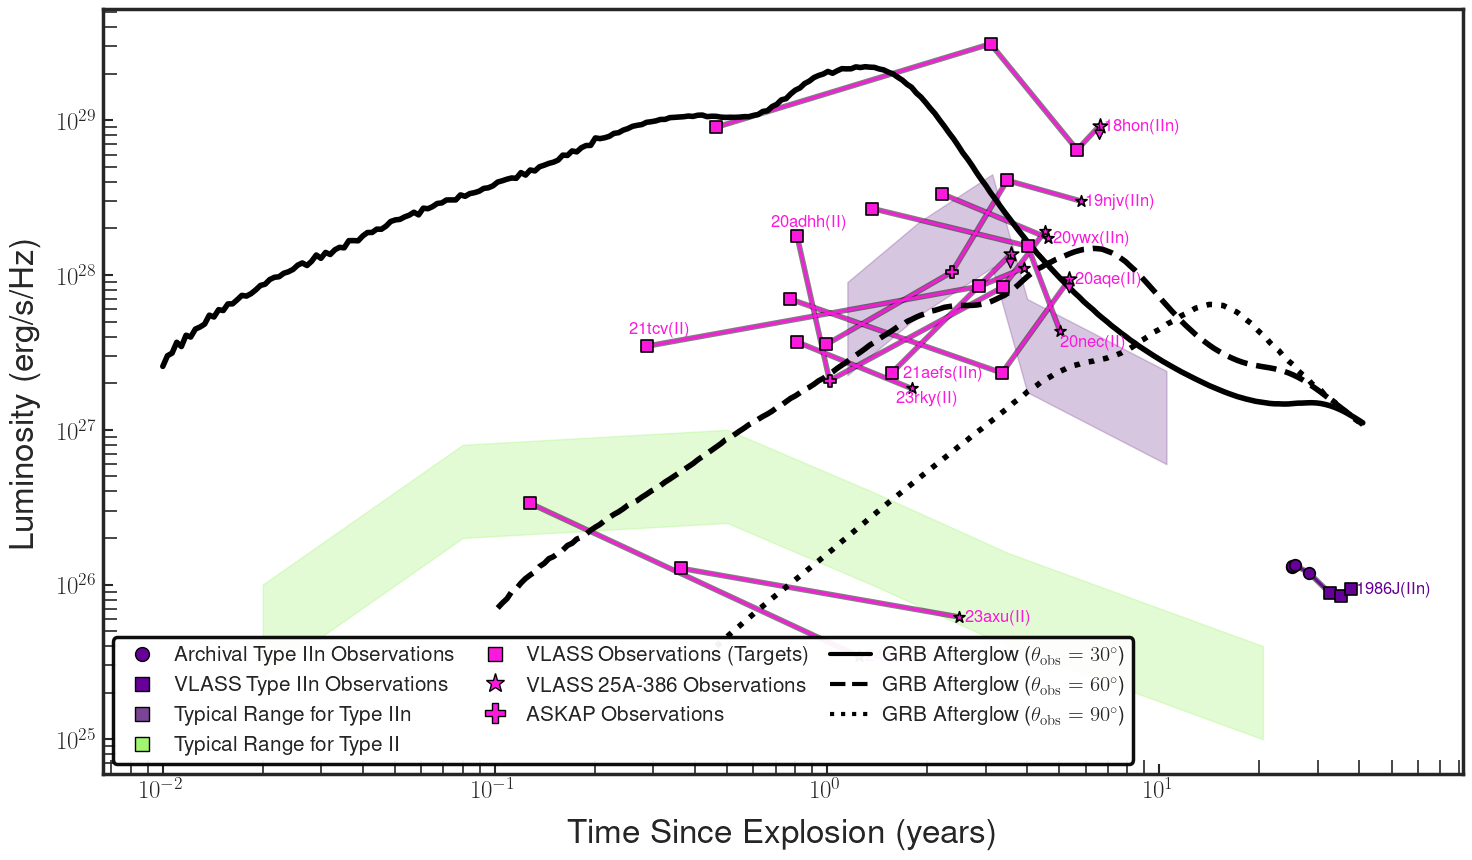

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "text.usetex": True,  
})

df = pd.read_csv('/Users/Djslime07/OpticalProperties/h_rich.csv')

classification_styles = {
    'Archival Ibc': {'color': '#04e3ff', 'marker': 'o'},
    'VLASS Ibc': {'color': '#04e3ff', 'marker': 's'},

    'Archival II': {'color': "#5cff04", 'marker': 'o'},
    'VLASS II': {'color': '#5cff04', 'marker': 's'},

    'Archival IIn': {'color': '#660099', 'marker': 'o'},
    'VLASS IIn': {'color': '#660099', 'marker': 's'},

    'new_VLASS': {'color': '#fb19dd', 'marker': 's'},
    '25A-386 Observations': {'color': '#fb19dd', 'marker': '*'},
    '25A-386 upper': {'color': '#fb19dd', 'marker': 'v'},
    'ASKAP Observations': {'color': '#fb19dd', 'marker': 'P'},

    'Ib/c average': {'color': "#7ad3df", 'marker': 's'},
    'II average': {'color': "#a0f571", 'marker': 's'},
    'IIn average': {'color': "#7B4596", 'marker': 's'},

    'grb30': {'color': 'black', 'linestyle': '-', 'marker': 'o'},
    'grb60': {'color': "black", 'linestyle': '--', 'marker': 'o'},
    'grb90': {'color': "black", 'linestyle': ':', 'marker': 'o'},
}

label_these = [
    'SN2018hon', 'SN2019aur', 'SN2019njv', 'SN2019pqo', 'SN2019wqq',
    'SN2020aqe', 'SN2020adhh', 'SN2020nec', 'SN2020ywx', 'SN2021aefs',
    'SN2021tcv', 'SN2023axu', 'SN2023rky', 'SN2024ehs', '1986J'
]

fig, ax = plt.subplots(figsize=(16, 9))
texts = []

for sn, group in df.groupby('SN'):
    group_sorted = group.sort_values(by='dt (years)')
    group_sorted = group_sorted[group_sorted['dt (years)'] >= 0]
    if group_sorted.empty:
        continue

    line_cls = str(group_sorted.iloc[0]['classification'])
    line_style = classification_styles.get(line_cls, {'color': 'gray', 'marker': 'o'})

    if line_cls in ["grb30", "grb60", "grb90"]:
        ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle=line_style.get('linestyle', '-'),
                color=line_style['color'],
                linewidth=4,
                zorder=2)
    elif line_cls in ["IIn average", "Ib/c average", "II average"]:
        group_sorted['Luminosity_upper'] = group_sorted['Luminosity'] * 2
        group_sorted['Luminosity_lower'] = group_sorted['Luminosity'] * 0.5

        ax.fill_between(group_sorted['dt (years)'],
                        group_sorted['Luminosity_lower'],
                        group_sorted['Luminosity_upper'],
                        color=line_style['color'],
                        alpha=0.3,
                        zorder=0)
    else:
        if sn in label_these:
            ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                    linestyle='-', color='black', linewidth=4.0, alpha=0.5, zorder=0)

        ax.plot(group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle='-', color=line_style['color'], linewidth=2.2, alpha=0.9, zorder=1)

    if line_cls not in ["IIn average", "Ib/c average", "II average", "grb30", "grb60", "grb90"]:
        for _, row in group_sorted.iterrows():
            cls = str(row['classification'])
            status = row['status']
            style = classification_styles.get(cls, {'color': 'gray', 'marker': 'o'})
            if status == 'real':
                marker = style['marker']
                ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker=marker,
                   s=70, edgecolor='black', linewidth=1.2, zorder=2)
            elif status == 'upper':
                ax.scatter(row['dt (years)'], row['Luminosity'],
                   color=style['color'], marker='*',
                   s=120, edgecolor='black', linewidth=1.2, zorder=2)
                ax.annotate(
                    '', 
                    xy=(row['dt (years)'], row['Luminosity'] * 0.8), 
                    xytext=(row['dt (years)'], row['Luminosity']),   
                    arrowprops=dict(facecolor='#fb19dd', edgecolor='black', arrowstyle='-|>', lw=1, shrinkA=0, shrinkB=0),
                    annotation_clip=False
        )

    if sn in label_these and line_cls != "IIn average":
        final_row = group_sorted.iloc[-1]
        short_label = re.sub(r'^SN20(\d{2})', r'\1', sn)

        sn_type = final_row.get('type', '') 
        if pd.isna(sn_type):
            sn_type = ''
        else:
            sn_type = f"({sn_type})"

        label_text = f"{short_label}{sn_type}"

        x_offset = final_row['dt (years)'] * 1.04
        y_coord = final_row['Luminosity']
        if sn == 'SN2023rky':
            y_coord *= 0.87; x_offset = final_row['dt (years)'] * 0.9
        if sn == 'SN2020adhh':
            y_coord *= 1.14;  x_offset = final_row['dt (years)'] * 0.15
        if sn == 'SN2021aefs':
            y_coord *= 0.17; x_offset = final_row['dt (years)'] * 0.475
        if sn == 'SN2021tcv':
            y_coord *= 0.4; x_offset = final_row['dt (years)'] * 0.065
        if sn == 'SN2020nec':
            y_coord *= 0.85; x_offset = final_row['dt (years)'] * 1

        text = ax.text(x_offset, y_coord, label_text,
                   fontsize=12, color=line_style['color'],
                   ha='left', va='center')
        texts.append(text)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Archival Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='VLASS Type IIn Observations',
           markerfacecolor='#660099', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type IIn',
           markerfacecolor='#7B4596', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', label='Typical Range for Type II',
           markerfacecolor='#a0f571', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='s', color='w', label='VLASS Observations (Targets)',
           markerfacecolor='#fb19dd', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='*', color='w', label='VLASS 25A-386 Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'), 
    Line2D([0], [0], marker='P', color='w', label='ASKAP Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'), 

    Line2D([0], [0], color='black', lw=3, linestyle='-', label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 30^\circ$)',),
    Line2D([0], [0], color="black", lw=3, linestyle='--', label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 60^\circ$)',),
    Line2D([0], [0], color='black', lw=3, linestyle=':', label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 90^\circ$)',),
]


ax.legend(
    handles=legend_elements,
    loc='lower left',
    fontsize=15,
    frameon=True,
    framealpha=0.95,
    ncol=3,          
    handletextpad=0.5,
    columnspacing=1.0
)

ax.set_xscale('log')
ax.set_yscale('log')
xmax = df['dt (years)'].max()
ax.set_xlim(right=xmax * 2)
ax.set_xlabel('Time Since Explosion (years)', fontsize=24, labelpad=12)
ax.set_ylabel('Luminosity (erg/s/Hz)', fontsize=24, labelpad=12)
plt.tick_params(axis='both', which='major', labelsize=18)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.5)
legend.get_frame().set_edgecolor('black')

ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))

ax.tick_params(axis='both', which='minor', length=10, width=1.2)
plt.subplots_adjust(bottom=0.1, left=0.1, right=0.95, top=0.95)
plt.savefig('luminosity_Hrich.pdf', format='pdf', bbox_inches='tight')
plt.savefig('luminosity_Hrich.png', format='png', bbox_inches='tight', dpi=1300)

## H-Poor Plot

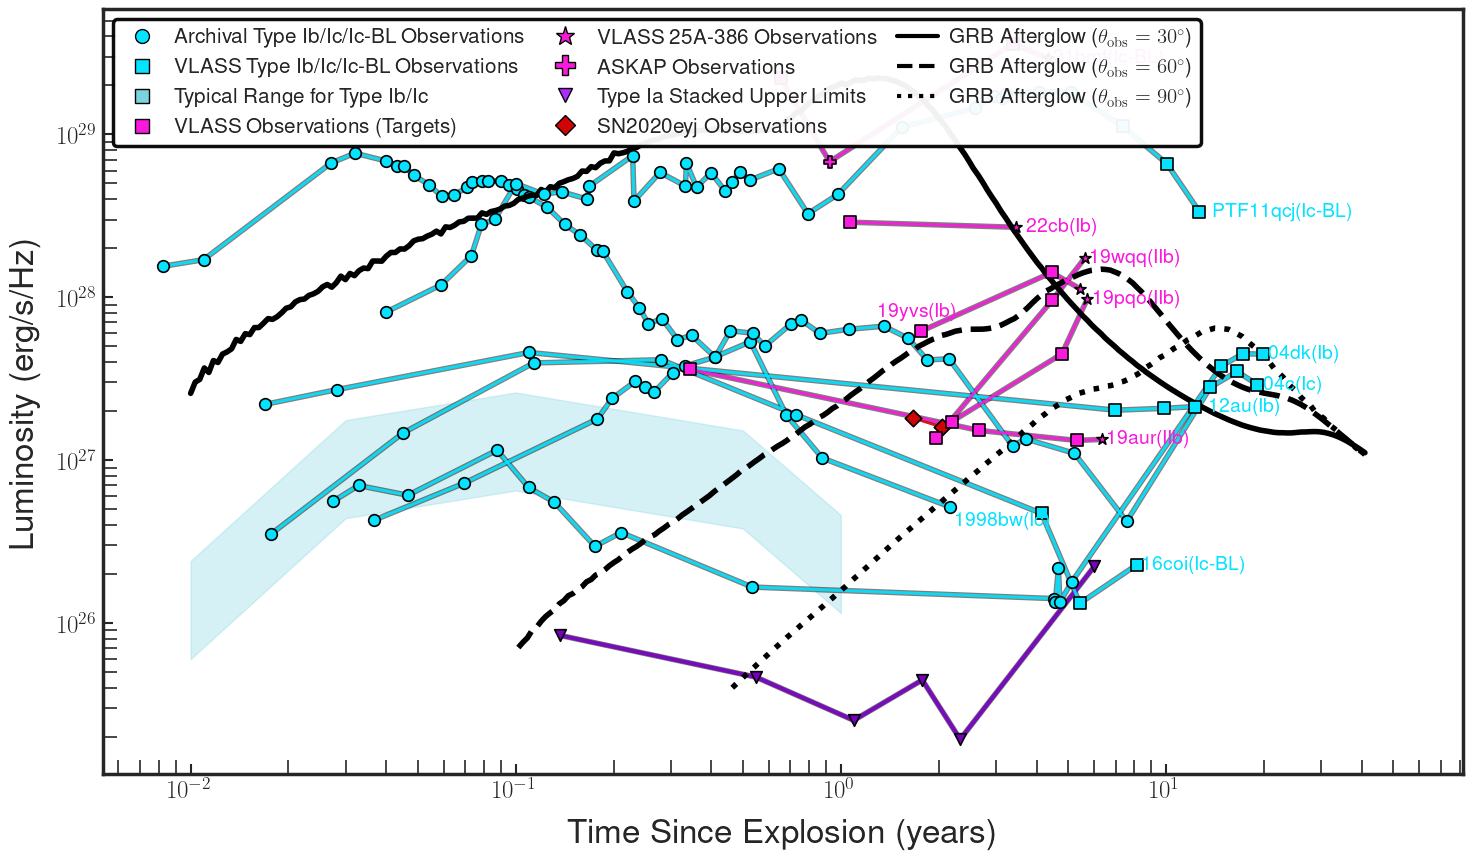

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 16,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "text.usetex": True,
})

df = pd.read_csv('/Users/Djslime07/OpticalProperties/h_poor.csv')

classification_styles = {
    'Archival Ibc': {'color': '#04e3ff', 'marker': 'o'},
    'VLASS Ibc': {'color': '#04e3ff', 'marker': 's'},

    'new_VLASS': {'color': '#fb19dd', 'marker': 's'},
    '25A-386 Observations': {'color': '#fb19dd', 'marker': '*'},
    '25A-386 upper': {'color': '#fb19dd', 'marker': 'v'},
    'ASKAP Observations': {'color': '#fb19dd', 'marker': 'P'},

    'Ib/c average': {'color': "#7ad3df", 'marker': 's'},

    'grb30': {'color': 'black', 'linestyle': '-', 'marker': 'o'},
    'grb60': {'color': "black", 'linestyle': '--', 'marker': 'o'},
    'grb90': {'color': "black", 'linestyle': ':', 'marker': 'o'},

    '1a': {'color': "#7601bf", 'marker': 'v'},
    'eyj': {'color': "#cf0505", 'marker': 'D'},
}

label_these = [
    'SN2019yvs', 'SN2021bmf', 'SN2022cb', 'SN2004c', 'SN2004dk', 'PTF11qcj',
    'SN2012au', 'SN2016coi', '1998bw', 'SN2019aur', 'SN2019pqo', 'SN2019wqq'
]

fig, ax = plt.subplots(figsize=(16, 9))
texts = []

for sn, group in df.groupby('SN'):
    group_sorted = group.sort_values(by='dt (years)')
    group_sorted = group_sorted[group_sorted['dt (years)'] >= 0]
    if group_sorted.empty:
        continue

    line_cls = str(group_sorted.iloc[0]['classification'])
    line_style = classification_styles.get(line_cls, {'color': 'gray', 'marker': 'o'})

    if line_cls in ["grb30", "grb60", "grb90"]:
        ax.plot(
            group_sorted['dt (years)'], group_sorted['Luminosity'],
            linestyle=line_style.get('linestyle', '-'),
            color=line_style['color'],
            linewidth=4,
            zorder=2
        )

    elif line_cls in ["IIn average", "Ib/c average", "II average"]:
        group_sorted['Luminosity_upper'] = group_sorted['Luminosity'] * 2
        group_sorted['Luminosity_lower'] = group_sorted['Luminosity'] * 0.5

        ax.fill_between(
            group_sorted['dt (years)'],
            group_sorted['Luminosity_lower'],
            group_sorted['Luminosity_upper'],
            color=line_style['color'],
            alpha=0.3,
            zorder=0
        )

    else:
        if sn in label_these or line_cls == "1a":
            ax.plot(
                group_sorted['dt (years)'], group_sorted['Luminosity'],
                linestyle='-', color='black', linewidth=4.0, alpha=0.5, zorder=0
            )

        main_lw = 3.0 if line_cls == "1a" else 2.2
        ax.plot(
            group_sorted['dt (years)'], group_sorted['Luminosity'],
            linestyle='-', color=line_style['color'],
            linewidth=main_lw, alpha=0.9, zorder=1
        )

    if line_cls not in ["IIn average", "Ib/c average", "II average", "grb30", "grb60", "grb90"]:
        for _, row in group_sorted.iterrows():
            cls = str(row['classification'])
            status = row['status']
            style = classification_styles.get(cls, {'color': 'gray', 'marker': 'o'})

            if status == 'real':
                marker = style['marker']
                ax.scatter(
                    row['dt (years)'], row['Luminosity'],
                    color=style['color'], marker=marker,
                    s=70, edgecolor='black', linewidth=1.2, zorder=2
                )

            elif status == 'upper':
                marker = style.get('marker', 'o')
                ax.scatter(
                    row['dt (years)'], row['Luminosity'],
                    color=style['color'], marker=marker,
                    s=120, edgecolor='black', linewidth=1.2, zorder=2
                )
                ax.annotate(
                    '',
                    xy=(row['dt (years)'], row['Luminosity'] * 0.8),
                    xytext=(row['dt (years)'], row['Luminosity']),
                    arrowprops=dict(
                        facecolor=style['color'],
                        edgecolor='black',
                        arrowstyle='-|>',
                        lw=1,
                        shrinkA=0,
                        shrinkB=0
                    ),
                    annotation_clip=False
                )

    if sn in label_these and line_cls != "IIn average":
        final_row = group_sorted.iloc[-1]
        short_label = re.sub(r'^SN20(\d{2})', r'\1', sn)

        sn_type = final_row.get('type', '')
        if pd.isna(sn_type):
            sn_type = ''
        else:
            sn_type = f"({sn_type})"

        label_text = f"{short_label}{sn_type}"

        x_offset = final_row['dt (years)'] * 1.04
        y_coord = final_row['Luminosity']

        if sn == 'SN2022cb':
            y_coord *= 1
            x_offset = final_row['dt (years)'] * 1.07

        if sn == 'SN2019yvs':
            y_coord *= 0.72
            x_offset = final_row['dt (years)'] * 0.24

        if sn == 'PTF11qcj':
            x_offset = final_row['dt (years)'] * 1.1

        if sn == 'SN2012au':
            x_offset = final_row['dt (years)'] * 1.1

        if sn == '1998bw':
            y_coord *= 0.82

        text = ax.text(
            x_offset, y_coord, label_text,
            fontsize=14, color=line_style['color'],
            ha='left', va='center'
        )
        texts.append(text)

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label='Archival Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w',
           label='VLASS Type Ib/Ic/Ic-BL Observations',
           markerfacecolor='#04e3ff', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w',
           label='Typical Range for Type Ib/Ic',
           markerfacecolor='#7ad3df', markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='s', color='w',
           label='VLASS Observations (Targets)',
           markerfacecolor='#fb19dd', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='*', color='w',
           label='VLASS 25A-386 Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'),
    Line2D([0], [0], marker='P', color='w',
           label='ASKAP Observations',
           markerfacecolor="#fb19dd", markersize=14, markeredgecolor='black'),

    Line2D([0], [0], marker='v', color='w',
           label='Type Ia Stacked Upper Limits',
           markerfacecolor="#ae2cff", markersize=10, markeredgecolor='black'),

    Line2D([0], [0], marker='D', color='w',
           label='SN2020eyj Observations',
           markerfacecolor="#cf0505", markersize=10, markeredgecolor='black'),

    Line2D([0], [0], color='black', lw=3, linestyle='-',
           label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 30^\circ$)'),
    Line2D([0], [0], color="black", lw=3, linestyle='--',
           label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 60^\circ$)'),
    Line2D([0], [0], color='black', lw=3, linestyle=':',
           label=r'GRB Afterglow ($\theta_{\mathrm{obs}} = 90^\circ$)'),
]

ax.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=15,
    frameon=True,
    framealpha=0.95,
    ncol=3,
    handletextpad=0.5,
    columnspacing=1.0
)

ax.set_xscale('log')
ax.set_yscale('log')
xmax = df['dt (years)'].max()
ax.set_xlim(right=xmax * 2)

ax.set_xlabel('Time Since Explosion (years)', fontsize=24, labelpad=12)
ax.set_ylabel('Luminosity (erg/s/Hz)', fontsize=24, labelpad=12)

plt.tick_params(axis='both', which='major', labelsize=18)

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.5)
legend.get_frame().set_edgecolor('black')

ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=100))
ax.tick_params(axis='both', which='minor', length=10, width=1.2)

plt.subplots_adjust(bottom=0.1, left=0.1, right=0.95, top=0.95)
plt.savefig('luminosity_Hpoor.pdf', format='pdf', bbox_inches='tight')
plt.savefig('luminosity_Hpoor.png', format='png', bbox_inches='tight', dpi=1050)

## Temporal Indices Plots

In [1]:
import pandas as pd
import numpy as np

file_path = "S_band_data.csv"  
df = pd.read_csv(file_path)

alpha_results = []

grouped = df.groupby("Name")

for name, group in grouped:
    group_sorted = group.sort_values("TimeSinceYears")

    times = group_sorted["TimeSinceYears"].values
    fluxes = group_sorted["Flux"].values
    mjds = group_sorted["MJD"].values
    rmses = group_sorted["RMS"].values


    for i in range(len(times) - 1):
        t1, t2 = times[i], times[i + 1]
        f1, f2 = fluxes[i], fluxes[i + 1]
        e1, e2 = rmses[i], rmses[i + 1]
        m1, m2 = mjds[i], mjds[i + 1]

        if t1 <= 0 or t2 <= 0 or f1 <= 0 or f2 <= 0:
            continue

        log_ratio_time = np.log10(t2 / t1)
        log_ratio_flux = np.log10(f2 / f1)
        alpha = log_ratio_flux / log_ratio_time

        ln10 = np.log(10)
        flux_error_term = ((e1 / (f1 * ln10))**2 + (e2 / (f2 * ln10))**2)
        alpha_error = np.sqrt(flux_error_term) / log_ratio_time

        alpha_results.append({
            "Name": name,
            "MJD_1": m1,
            "MJD_2": m2,
            "Time_1": t1,
            "Time_2": t2,
            "Flux_1": f1,
            "Flux_2": f2,
            "RMS_1": e1,
            "RMS_2": e2,
            "Alpha": alpha,
        })

new_df = pd.DataFrame(alpha_results)
new_df.to_csv("temporal_index.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

lum_df = pd.read_csv('S_band_data.csv')
names = lum_df[lum_df["TimeSinceYears"] > 0]["Name"].unique()
cmap = cm.get_cmap('cool', len(names))  

for i, name in enumerate(names):
    group = lum_df[(lum_df["Name"] == name) & (lum_df["TimeSinceYears"] > 0)].copy()
    group_sorted = group.sort_values("TimeSinceYears")

    time = group_sorted["TimeSinceYears"].values
    flux = group_sorted["Flux"].values
    rms = group_sorted["RMS"].values
    status = group_sorted["Status"].values
    is_ul = status == "upper"

    color = cmap(i)

    alphas = new_df[new_df["Name"] == name]["Alpha"].values
    alpha_str = ", ".join([rf"$\alpha_{{{i+1}}} = {a:.3f}$" for i, a in enumerate(alphas)])

    plt.figure()
    plt.plot(time, flux, linestyle='-', color=color, alpha=0.7)
    plt.errorbar(
        time[~is_ul], flux[~is_ul], yerr=rms[~is_ul],
        fmt='o', color=color, label=f'3 GHz, {alpha_str}', capsize=3
    )
    plt.plot(time[is_ul], flux[is_ul], 'v', color=color)
    plt.xlabel("Time Since Explosion (years)")
    plt.ylabel("Flux Density (mJy)")
    plt.title(f"{name}")
    plt.legend(loc="best", fontsize="small")
    plt.grid(True)
    plt.tight_layout()

    save_path = f'/Users/Djslime07/OpticalProperties/temporal_index_plots/{name}_alpha_plot.pdf'
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.close()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import math
import matplotlib.lines as mlines

AXIS_LABEL_FONTSIZE = 16      
TICK_LABEL_FONTSIZE = 12      
LEGEND_FONTSIZE = 12           
TITLE_FONTSIZE = 14            

lum_df = pd.read_csv('S_band_data.csv')
lum_df['Status'] = lum_df['Status'].str.strip()
names = lum_df[lum_df["TimeSinceYears"] > 0]["Name"].unique()

new_df = pd.read_csv('temporal_index.csv')

n = len(names)

def get_layout(n):
    pattern = [4, 4, 4, 3, 2]
    layout = []
    remaining = n
    i = 0
    while remaining > 0:
        row_len = min(pattern[i % len(pattern)], remaining)
        layout.append(row_len)
        remaining -= row_len
        i += 1
    return layout

layout = get_layout(n)           
nrows = len(layout)
ncols = max(layout)              

fig, axes = plt.subplots(
    nrows,
    max(layout),           
    figsize=(16, 4 * nrows),
    squeeze=False
)

cmap = cm.get_cmap('cool', n)

row_start_indices = []
start = 0
for num_cols in layout:
    row_start_indices.append(start)
    start += num_cols

for idx, name in enumerate(names):

    tmp = idx
    row = 0
    for r, num_cols in enumerate(layout):
        if tmp < num_cols:
            row = r
            col = tmp
            break
        tmp -= num_cols

    ax = axes[row][col]

    group = lum_df[(lum_df["Name"] == name) & (lum_df["TimeSinceYears"] > 0)].copy()
    group_sorted = group.sort_values("TimeSinceYears")

    time = group_sorted["TimeSinceYears"].values
    flux = group_sorted["Flux"].values
    rms = group_sorted["RMS"].values
    status = group_sorted["Status"].values
    is_ul = status == "upper"

    color = cmap(idx)

    alphas = new_df[new_df["Name"] == name]["Alpha"].values
    alpha_str = ", ".join([rf"$\alpha_{{{i+1}}} = {a:.1g}$" for i, a in enumerate(alphas)])

    ax.plot(time, flux, linestyle='-', color='black', linewidth=3.0, alpha=0.9, zorder=1)
    ax.plot(time, flux, linestyle='-', color=color, linewidth=1.8, alpha=0.9, zorder=2)

    ax.errorbar(time[~is_ul], flux[~is_ul], yerr=rms[~is_ul],
                fmt='o', color=color, label=f'3 GHz, {alpha_str}', capsize=3)
    ax.plot(time[is_ul], flux[is_ul], 'v', color=color)

    ax.set_title(name, fontsize=TITLE_FONTSIZE)

    if idx in row_start_indices:
        ax.set_ylabel("Flux (mJy)", fontsize=AXIS_LABEL_FONTSIZE)
    else:
        ax.set_ylabel("")

    if row == nrows - 1:
        ax.set_xlabel("Time Since Explosion (yr)", fontsize=AXIS_LABEL_FONTSIZE)
    else:
        ax.set_xlabel("")
        ax.tick_params(axis='x', which='major', labelsize=TICK_LABEL_FONTSIZE)


    ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

    ax.grid(True)
    ax.legend(
        fontsize=LEGEND_FONTSIZE,
        frameon=True,
        fancybox=False,
        edgecolor="0.7",
        facecolor="white",
        framealpha=1.0
    )

for r, num_cols in enumerate(layout):
    for c in range(num_cols, ncols):
        fig.delaxes(axes[r][c])

plt.subplots_adjust(
    left=0.06,      
    right=0.98,
    top=0.97,
    bottom=0.12,
    wspace=0.25,    
    hspace=0.35    
)

handles = [
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', label='Flux Detection'),
    mlines.Line2D([], [], color='black', marker='v', linestyle='None', label='Upper Limit'),
]

fig.legend(
    handles=handles,
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.5, -0.02),
    fontsize=LEGEND_FONTSIZE,
    frameon=True,         
    fancybox=False,       
    edgecolor="0.7",      
    facecolor="white",    
    framealpha=1.0,       
)

plt.tight_layout()

output_path = '/Users/Djslime07/OpticalProperties/temporal_index_plots/all_alpha_lightcurves_grid.pdf'
plt.savefig(output_path, format='pdf', bbox_inches='tight')

print("Saved to:", output_path)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

lum_df = pd.read_csv('S_band_data.csv')
lum_df['Status'] = lum_df['Status'].str.strip()
names = lum_df[lum_df["TimeSinceYears"] > 0]["Name"].unique()

new_df = pd.read_csv('temporal_index.csv')  

def get_layout(n):
    pattern = [4, 4, 4, 3, 2]
    layout = []
    remaining = n
    i = 0
    while remaining > 0:
        row_len = min(pattern[i % len(pattern)], remaining)
        layout.append(row_len)
        remaining -= row_len
        i += 1
    return layout

n = len(names)
layout = get_layout(n)
nrows = len(layout)
maxcols = max(layout)

fig, axes = plt.subplots(nrows, maxcols, figsize=(16, 4 * nrows), squeeze=False)
cmap = cm.get_cmap('cool', n)

for idx, name in enumerate(names):
    row = 0
    col = idx
    for r, num_cols in enumerate(layout):
        if col < num_cols:
            row = r
            break
        col -= num_cols

    ax = axes[row][col]
    color = cmap(idx)

    group = lum_df[(lum_df["Name"] == name) & (lum_df["TimeSinceYears"] > 0)].copy()
    group_sorted = group.sort_values("TimeSinceYears")

    time = group_sorted["TimeSinceYears"].values
    flux = group_sorted["Flux"].values
    rms = group_sorted["RMS"].values
    status = group_sorted["Status"].values
    is_ul = status == "upper"

    alphas = new_df[new_df["Name"] == name]["Alpha"].values
    alpha_str = ", ".join([rf"$\alpha_{{{i+1}}} = {a:.3f}$" for i, a in enumerate(alphas)])

    ax.plot(time, flux, linestyle='-', color=color, alpha=0.7)
    ax.errorbar(time[~is_ul], flux[~is_ul], yerr=rms[~is_ul],
                fmt='o', color=color, label=f'3 GHz, {alpha_str}', capsize=3)
    ax.plot(time[is_ul], flux[is_ul], 'v', color=color)

    ax.set_title(name)
    ax.set_xlabel("Time Since Explosion (yr)")
    ax.set_ylabel("Flux Density (mJy)")
    ax.grid(True)
    ax.legend(loc='best', fontsize=10.5)

for r, num_cols in enumerate(layout):
    for c in range(num_cols, maxcols):
        fig.delaxes(axes[r][c])

plt.tight_layout()
output_path = '/Users/Djslime07/OpticalProperties/temporal_index_plots/all_alpha_lightcurves_grid.pdf'
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd

grb = pd.read_csv("Luminosity_vs_rest_3GHz_2E51n0_01_thobs_90.csv")

new_cols = ['SN','mjd obs','flux (mJy)','mjd exp date','dt (days)','dt (years)',
            'redshift','Luminosity','classification','status','type']

df = pd.DataFrame({
    'SN': ['GRB90']*len(grb),                      
    'mjd obs': ['']*len(grb),
    'flux (mJy)': ['']*len(grb),
    'mjd exp date': ['']*len(grb),
    'dt (days)': ['']*len(grb),
    'dt (years)': grb['dt (years)'],
    'redshift': ['']*len(grb),
    'Luminosity': grb['Lum/(1+z)(erg/s/Hz)'],
    'classification': ['grb90']*len(grb),
    'status': ['real']*len(grb),
    'type': ['']*len(grb)
})

df.to_csv("grb_90_converted.csv", index=False)


## SN Type Frequency Histogram 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/Djslime07/OpticalProperties/histograms/vlass_with_type.csv')

def sn_group(sn_type):
    if sn_type == 'SN Ia':
        return 'SN Ia'
    elif sn_type in ['SN II', 'SN IIP']:
        return 'SN II + IIP'
    elif sn_type == 'SN IIn':
        return 'SN IIn'
    elif sn_type in ['SN Ib', 'SN Ic', 'SN IcBL']:
        return 'SN Ib + Ic + IcBL'
    else:
        return 'Other'

df['SN_group'] = df['type'].apply(sn_group)

groups = ['SN Ia', 'SN II + IIP', 'SN IIn', 'SN Ib + Ic + IcBL']
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, group in enumerate(groups):
    data = df[df['SN_group'] == group]['days_diff'].dropna()
    
    if len(data) == 0:
        axes[i].text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=14)
        axes[i].set_title(group)
        continue
    
    axes[i].hist(data, bins=20, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(group, fontsize=14)
    axes[i].set_xlabel('Days since optical peak')
    axes[i].set_ylabel('Number of VLASS detections')
    
    axes[i].axvline(0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('/Users/Djslime07/OpticalProperties/histograms/vlass_histograms_days_since_peak.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,8))

for i, group in enumerate(groups):
    data = df[df['SN_group'] == group]['days_diff'].dropna()
    if len(data) == 0:
        continue
    plt.hist(data, bins=20, color=colors[i], alpha=0.5, edgecolor='black', label=group)

plt.axvline(0, color='k', linestyle='--', alpha=0.7, label='Optical Peak')

plt.xlabel('Days since optical peak', fontsize=14)
plt.ylabel(r'\# of VLASS detections', fontsize=14)  
plt.title('Distribution of VLASS Observations Relative to Optical Peak', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/Users/Djslime07/OpticalProperties/histograms/vlass_histogram_overlaid.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('with_rms.csv')

sn_df  = df[df["SN"].str.startswith("SN", na=False)]
grb_df = df[df["SN"].str.startswith("GRB", na=False)]

sn_groups  = sn_df.groupby("SN")
grb_groups = grb_df.groupby("SN")

time_window_days = 365.0   # number of days around grb point
frac_tolerance = 0.2       # essentially a ~20% tolerance

results = []

for sn_name, sn in sn_groups:
    valid_sn = sn[["dt (days)", "Luminosity"]].dropna()
    t_sn = valid_sn["dt (days)"].values
    L_sn = valid_sn["Luminosity"].values

    if len(t_sn) < 1:
        continue

    for grb_name, grb in grb_groups:
        valid_grb = grb[["dt (years)","Luminosity"]].dropna()
        if len(valid_grb) < 1:
            continue

        t_grb = valid_grb["dt (years)"].values * 365.25
        L_grb = valid_grb["Luminosity"].values

        matches = 0
        for tj, Lj in zip(t_grb, L_grb):
            mask = (t_sn >= tj - time_window_days) & (t_sn <= tj + time_window_days)
            if np.any(np.abs(L_sn[mask] - Lj) / Lj <= frac_tolerance):
                matches += 1

        percent_overlap = 100 * matches / len(L_grb)

        results.append({
            "SN": sn_name,
            "GRB_model": grb_name,
            "percent_overlap": percent_overlap
        })

fit_df = pd.DataFrame(results)
summary_table = fit_df.pivot(index="SN", columns="GRB_model", values="percent_overlap")
print(summary_table)

# GRB Stuff

## Version 1 - Rough Sketch

In [ ]:
import pandas as pd
from astropy.cosmology import Planck18

df = pd.read_csv('/Users/Djslime07/OpticalProperties/histograms/super_merged_data.csv')

is_ibc = (df['type'].values == 'SN Ic') | (df['type'].values == 'SN IcBL') | (df['type'].values == 'SN Ib')

flux = df[is_ibc]['flux']
lnu = flux * 1E-3 * 1E-23 * 4 * np.pi * (Planck18.luminosity_distance(df[is_ibc]['redshift'].astype(float)).to('cm').value)**2 
rms = df[is_ibc]['rms']
z = df[is_ibc]['redshift']
t = df[is_ibc]['days_diff']

# Figure out the list of your detected supernovae, and select those rows separately 
is_det = flux/rms > 4 # check if the name is in some list or

flux/rms > 4

# Detections
plt.scatter(t[is_det]/365, lnu[is_det], color='#04e3ff', marker='o', label='Type Ib/c Detected', edgecolor='black', s=100, zorder=3)

# Non-detections
plt.scatter(t[~is_det]/365, lnu[~is_det], color='#04e3ff', marker='v', label='Type Ib/c Non-detected', edgecolor='black', s=100, zorder=2)

plt.yscale('log')
plt.xscale('log')

df = pd.read_csv('grb_30_converted.csv')
grb_flux = df['Luminosity']
grb_dt_yr = df['dt (years)']

plt.plot(grb_dt_yr, grb_flux)
plt.yscale('log')
plt.xscale('log')

# Target Objects and 1bc vs GRB

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18

main = pd.read_csv("/Users/Djslime07/OpticalProperties/histograms/super_merged_data.csv")
special = pd.read_csv("S_band_data.csv")
grb = pd.read_csv("grb_30_converted.csv")

is_ibc = main['type'].isin(['SN Ic', 'SN IcBL', 'SN Ib'])

flux = main.loc[is_ibc, 'flux']
lnu = flux * 1e-3 * 1e-23 * 4 * np.pi * (
    Planck18.luminosity_distance(main.loc[is_ibc, 'redshift'].astype(float))
           .to('cm').value)**2

rms  = main.loc[is_ibc, 'rms']
t    = main.loc[is_ibc, 'days_diff']
is_det = flux / rms > 4

special_names = set(special['Name'])

not_special_mask = ~main['name'].isin(special_names) & is_ibc

fig1, ax1 = plt.subplots(figsize=(6,5))
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.scatter(special['TimeSinceYears'], special['luminosity (erg/s/Hz)'],
            c='crimson', s=120, edgecolor='black',
            marker='*', label='Target SNe')

ax1.plot(grb['dt (years)'], grb['Luminosity'],
         color='black', lw=2, label='GRB light curve')

ax1.set_xlabel('Time since explosion (years)')
ax1.set_ylabel('Radio Luminosity (erg/s/Hz)')
ax1.legend()
fig1.tight_layout()

fig2, ax2 = plt.subplots(figsize=(6,5))
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.scatter(t[not_special_mask & is_det]/365,
            lnu[not_special_mask & is_det],
            color='#04e3ff', marker='o', edgecolor='black',
            s=100, label='Ib/c Detected')

ax2.scatter(t[not_special_mask & ~is_det]/365,
            lnu[not_special_mask & ~is_det],
            color='#04e3ff', marker='v', edgecolor='black',
            s=100, label='Ib/c Non-detected')
ax2.plot(grb['dt (years)'], grb['Luminosity'],
         color='black', lw=2, label='GRB light curve')

ax2.set_xlabel('Time since explosion (years)')
ax2.set_ylabel('Radio Luminosity (erg/s/Hz)')
ax2.legend()
fig2.tight_layout()

plt.show()


# Candidates vs GRB 30

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.cosmology import Planck18
import matplotlib.pyplot as plt

main_csv   = "/Users/Djslime07/OpticalProperties/histograms/super_merged_data.csv"
grb_csv    = "grb_30_converted.csv"

main   = pd.read_csv(main_csv)
grb    = pd.read_csv(grb_csv)

is_ibc = main['type'].isin(['SN Ic', 'SN Ic-BL', 'SN Ib', 'SN Ib/c'])
print(f"Total Type Ib/c SNe: {is_ibc.sum()}")

grb_interp = interp1d(
    np.log10(grb['dt (years)']),
    np.log10(grb['Luminosity']),
    bounds_error=False,
    fill_value=-np.inf
)

candidate_names = []
records = []

for name, g in main[is_ibc].groupby('name'):
    times_yr = g['days_diff'].astype(float) / 365.0

    lum = (g['flux'].astype(float) * 1e-3 * 1e-23 *
           4 * np.pi *
           Planck18.luminosity_distance(g['redshift'].astype(float)).to('cm').value**2)
    grb_lum = 10**grb_interp(np.log10(times_yr))

    det_mask   = (g['flux'] / g['rms']) > 4
    upper_mask = ~det_mask

    mask_det   = det_mask & (lum >= grb_lum)
    mask_upper = upper_mask & (lum >= grb_lum)
    mask_any   = mask_det | mask_upper

    if mask_any.any():
        candidate_names.append(name)
        tmp = g.loc[mask_any].copy()
        tmp['detection_type']       = np.where(mask_det[mask_any], 'detection', 'upper_limit')
        tmp['luminosity_cgs']       = lum[mask_any].values
        tmp['grb_luminosity_cgs']   = grb_lum[mask_any]
        tmp['time_years']           = times_yr[mask_any].values
        records.append(tmp)

if records:
    pd.concat(records, ignore_index=True).to_csv("GRB_points_above_curve.csv", index=False)

print(f"Found {len(candidate_names)} candidate SNe.")
print("Results saved to GRB_candidates.csv and GRB_points_above_curve.csv")

if candidate_names:
    plt.figure(figsize=(6,5))
    plt.loglog(grb['dt (years)'], grb['Luminosity'], 'k-', lw=2, label="GRB 30 template")

    above_df = pd.concat(records, ignore_index=True)
    dets = above_df[above_df['detection_type'] == 'detection']
    plt.scatter(dets['time_years'], dets['luminosity_cgs'],
                color="#FDB515", s=50, edgecolor='black', marker='o',
                label='Detection')

    uppers = above_df[above_df['detection_type'] == 'upper_limit']
    plt.scatter(uppers['time_years'], uppers['luminosity_cgs'],
                color="#002676", s=50, edgecolor='black', marker='v',
                label='Upper limit')

    plt.xlabel("Time since explosion (years)")
    plt.ylabel("Radio Luminosity (erg/s/Hz)")
    plt.xlim(1e-2, 10)
    plt.ylim(1e27, 1e30)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Above GRB Cutoff - All Curves

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
from scipy.interpolate import interp1d

main_csv = "/Users/Djslime07/OpticalProperties/histograms/super_merged_data.csv"
special_csv = "S_band_data.csv"
classif = 'H_rich'

main = pd.read_csv(main_csv)
special = pd.read_csv(special_csv)

mask = main['type'].isin(["SN II", 'SN IIn', 'SN IIP'])
mask_backup = main['type'].isin(["SN Ib", 'SN Ic', 'SN Ic-BL', 'SN Ib/c', 'SN IIb'])
lum_cgs = (main.loc[mask, 'flux'].astype(float) * 1e-3 * 1e-23 *
           4 * np.pi *
           Planck18.luminosity_distance(main.loc[mask, 'redshift'].astype(float)).to('cm').value**2)
det_mask = main.loc[mask, 'flux'].astype(float) / main.loc[mask, 'rms'].astype(float) > 4

def plot_ibc_vs_grb(grb_csv, grb_angle, save_dir="/Users/Djslime07/OpticalProperties/grb_stuff/"):
    grb = pd.read_csv(grb_csv)
    
    grb_interp = interp1d(
        np.log10(grb['dt (years)']),
        np.log10(grb['Luminosity']),
        bounds_error=False,
        fill_value=-np.inf
    )
    
    candidate_names = []
    records = []

    for name, g in main[mask].groupby('name'):
        times_yr = g['days_diff'].astype(float) / 365
        lum = (g['flux'].astype(float) * 1e-3 * 1e-23 *
               4 * np.pi *
               Planck18.luminosity_distance(g['redshift'].astype(float)).to('cm').value**2)
        grb_lum = 10**grb_interp(np.log10(times_yr))

        det_mask_local = (g['flux'] / g['rms']) > 4
        upper_mask_local = ~det_mask_local
        mask_any = (lum >= grb_lum) & (det_mask_local | upper_mask_local)

        if mask_any.any():
            candidate_names.append(name)
            tmp = g.loc[mask_any].copy()
            tmp['detection_type'] = np.where(det_mask_local[mask_any], 'detection', 'upper_limit')
            tmp['luminosity_cgs'] = lum[mask_any].values
            tmp['grb_luminosity_cgs'] = grb_lum[mask_any]
            tmp['time_years'] = times_yr[mask_any].values
            records.append(tmp)

    if records:
        candidates_df = pd.concat(records, ignore_index=True)
        candidates_df.to_csv(f"{save_dir}{classif}_{grb_angle}_points_above_curve.csv", index=False)

    if records:
        above_df = pd.concat(records, ignore_index=True)

        det_sne = above_df.loc[above_df['detection_type'] == 'detection', 'name'].unique()
        n_det_sne = len(det_sne)

        ul_sne = above_df.loc[above_df['detection_type'] == 'upper_limit', 'name'].unique()
        n_ul_sne = len(ul_sne)

        n_unique_sne = main.loc[mask, 'name'].nunique()

    print(f"Total Type (unique): {n_unique_sne}")
    print(f"Found {len(candidate_names)} candidate SNe for GRB {grb_angle}°")
    print(f"With ≥1 real detection above template : {n_det_sne}")
    print(f"With ≥1 upper limit above template   : {n_ul_sne}")

    rule_outs = n_unique_sne - len(candidate_names)
    print(f"Ruled out (all points below template) : {rule_outs}")

    fig1, ax1 = plt.subplots(figsize=(6,5))
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.scatter(special['TimeSinceYears'], special['luminosity (erg/s/Hz)'],
                c='crimson', s=120, edgecolor='black', marker='*', label='Target SNe')
    ax1.plot(grb['dt (years)'], grb['Luminosity'], color='black', lw=2, label=f'{grb_angle}° GRB light curve')

    ax1.set_xlabel('Time since explosion (years)')
    ax1.set_ylabel('Radio Luminosity (erg/s/Hz)')
    ax1.legend()
    fig1.tight_layout()
    fig1.savefig(f'{save_dir}{classif}_targets_vs_grb{grb_angle}.pdf', bbox_inches='tight')

    not_special_mask = ~main['name'].isin(special['Name']) & mask
    fig2, ax2 = plt.subplots(figsize=(6,5))
    ax2.set_xscale('log')
    ax2.set_yscale('log')

    ax2.scatter(main.loc[not_special_mask & det_mask, 'days_diff']/365,
                lum_cgs[det_mask],
                color='#04e3ff', marker='o', edgecolor='black', s=100, label='H-Rich Detected')

    ax2.scatter(main.loc[not_special_mask & ~det_mask, 'days_diff']/365,
                lum_cgs[~det_mask],
                color='#04e3ff', marker='v', edgecolor='black', s=100, label='H-Rich Non-detected')

    ax2.plot(grb['dt (years)'], grb['Luminosity'], color='black', lw=2, label=f'{grb_angle}° GRB light curve')

    ax2.set_xlabel('Time since explosion (years)')
    ax2.set_ylabel('Radio Luminosity (erg/s/Hz)')
    ax2.legend()
    fig2.tight_layout()
    fig2.savefig(f'{save_dir}{classif}_ibc_vs_grb{grb_angle}.pdf', bbox_inches='tight')

    if candidate_names:
        plt.figure(figsize=(6,5))
        plt.loglog(grb['dt (years)'], grb['Luminosity'], 'k-', lw=2, label=f"{grb_angle}° GRB light curve")

        above_df = pd.concat(records, ignore_index=True)
        dets = above_df[above_df['detection_type'] == 'detection']
        plt.scatter(dets['time_years'], dets['luminosity_cgs'],
                    color="#FDB515", s=50, edgecolor='black', marker='o',
                    label=f'Detection')

        uppers = above_df[above_df['detection_type'] == 'upper_limit']
        plt.scatter(uppers['time_years'], uppers['luminosity_cgs'],
                    color="#002676", s=50, edgecolor='black', marker='v',
                    label='Upper limit')
        
        for name, g in dets.groupby('name'):
            if len(g) > 1:            
                g_sorted = g.sort_values('time_years')
                plt.plot(g_sorted['time_years'],
                         g_sorted['luminosity_cgs'],
                         ls='--', lw=1.2, color='gray', alpha=0.8)

        plt.xlabel("Time since explosion (years)")
        plt.ylabel("Radio Luminosity (erg/s/Hz)")
        plt.xlim(1e-2, 10)
        plt.ylim(1e27, 1e30)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'{save_dir}{classif}_det_vs_ul_vs_grb{grb_angle}.pdf', bbox_inches='tight')

plot_ibc_vs_grb("grb_30_converted.csv", 30)
plot_ibc_vs_grb("grb_60_converted.csv", 60)
plot_ibc_vs_grb("grb_90_converted.csv", 90)

# Two-Panel All Above GRB's

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
import numpy as np

def two_panel_all_and_above(
    save_dir="/Users/Djslime07/OpticalProperties/grb_stuff/",
    grb_files=["grb_30_converted.csv",
               "grb_60_converted.csv",
               "grb_90_converted.csv"],
    grb_styles=None
):

    if grb_styles is None:
        grb_styles = {
            "30": {"color": "blue",  "linestyle": "-"},
            "60": {"color": "green", "linestyle": "--"},
            "90": {"color": "red",   "linestyle": ":"}
        }

    grbs = []
    for f in grb_files:
        g = pd.read_csv(f)
        g["angle"] = f.split("_")[1]   
        grbs.append(g)

    mask_Hrich = main['type'].isin(["SN II","SN IIn","SN IIP"])
    mask_Hpoor = main['type'].isin(["SN Ib","SN Ic","SN Ic-BL","SN Ib/c","SN IIb"])

    def make_panel(ax, mask, det_label, ul_label, title=""):
        ax.set_xscale("log")
        ax.set_yscale("log")

        sub = main.loc[mask].copy()
        lum = (sub['flux'].astype(float) * 1e-3 * 1e-23 *
            4*np.pi *
            Planck18.luminosity_distance(
               sub['redshift'].astype(float)
           ).to('cm').value**2)

        detmask = (sub['flux'] / sub['rms']) > 4
        t_years = sub['days_diff'].astype(float) / 365.0

    # -----------------------------
    # 1. Upper limits (bottom layer)
    # -----------------------------
        ax.scatter(
            t_years[~detmask], lum[~detmask],
            s=40,
            c="#002676", edgecolor="black", marker="v",
            label=ul_label,
            zorder=0
        )

    # -----------------------------
    # 2. GRB model curves (middle)
    # -----------------------------
        for g in grbs:
            angle = g['angle'].iloc[0]
            style = grb_styles.get(angle, {})
            ax.plot(
                g['dt (years)'],
                g['Luminosity'],
                lw=1.5,
                label=f"{angle}° GRB Light Curve",
                zorder=1,
                **style
            )

    # -----------------------------
    # 3. Detections (top)
    # -----------------------------
        ax.scatter(
            t_years[detmask], lum[detmask],
            s=40,
            c="#FDB515", edgecolor="black", marker="o",
            label=det_label,
            zorder=2
        )

        #ax.set_xlabel("Time since explosion (years)")
        ax.set_ylabel("Radio Luminosity (erg/s/Hz)", fontsize=18)
        ax.set_xlim(1e-3, 50)
        ax.set_ylim(1e25, 1e30)
        ax.set_title(title)


    fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)

    make_panel(axs[0], mask_Hrich,
               det_label="H-Rich Detections",
               ul_label="H-Rich Upper Limits")

    make_panel(axs[1], mask_Hpoor,
               det_label="H-Poor Detections",
               ul_label="H-Poor Upper Limits")

    axs[0].legend(fontsize=8)
    axs[1].legend(fontsize=8)
    axs[1].set_ylabel("")

    fig.text(0.5, -0.02, "Time since explosion (years)", ha='center', fontsize=18)
    fig.tight_layout()
    fig.savefig(f"{save_dir}two_panel_all.pdf", bbox_inches="tight")
    fig.savefig(f"{save_dir}two_panel_all.png", bbox_inches="tight", dpi=1600)

custom_styles = {
    "30": {"color": "purple", "linestyle": "-."},
    "60": {"color": "orange", "linestyle": ":"},
    "90": {"color": "teal",   "linestyle": "--"}
}

two_panel_all_and_above(grb_styles=custom_styles)

# GRB vs SN 1a Wind Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
from scipy.interpolate import interp1d

main_csv = "/Users/Djslime07/OpticalProperties/histograms/super_merged_data.csv"
main2_csv = '/Users/Djslime07/OpticalProperties/1a_stuff/stacked_transient_luminosities.csv'
main = pd.read_csv(main_csv)

ia_mask = main['type'].isin(['SN Ia', 'SN Ia-91bg', 'SN Ia-91T', 'SN Ia-CSM', 'SN Ia-pec', 'SN Ia-SC'])
lum_cgs_all = (main.loc[ia_mask, 'flux'].astype(float) * 1e-3 * 1e-23 *
               4 * np.pi *
               Planck18.luminosity_distance(main.loc[ia_mask, 'redshift'].astype(float)).to('cm').value**2)
det_mask_all = main.loc[ia_mask, 'flux'].astype(float) / main.loc[ia_mask, 'rms'].astype(float) > 4


def plot_snIa_vs_model(model_csv,
                       save_dir="/Users/Djslime07/OpticalProperties/1a_stuff/",
                       classif="SN_Ia"):
    """
    Identify SN Ia with any point (detection or upper limit) above the given model curve,
    save CSV of those points, and create comparison plots.
    """
    model = pd.read_csv(model_csv)

    model_interp = interp1d(
        np.log10(model['days']/365.0),
        np.log10(model['luminosity']),
        bounds_error=False,
        fill_value=-np.inf
    )
    wind_model = r'Wind Model, $ 3 \times 10^{-2} M_{\odot} yr^{-1}, \varepsilon_B = 1.5 \times 10^{-5}$ '
    candidate_names = []
    records = []

    for name, g in main[ia_mask].groupby('name'):
        times_yr = g['days_diff'].astype(float) / 365
        lum = (g['flux'].astype(float) * 1e-3 * 1e-23 *
               4 * np.pi *
               Planck18.luminosity_distance(g['redshift'].astype(float)).to('cm').value**2)

        model_lum = 10**model_interp(np.log10(times_yr))

        det_mask_local = (g['flux'].astype(float) / g['rms'].astype(float)) > 4
        upper_mask_local = ~det_mask_local
        mask_any = (lum >= model_lum) & (det_mask_local | upper_mask_local)

        if mask_any.any():
            candidate_names.append(name)
            tmp = g.loc[mask_any].copy()
            tmp['detection_type'] = np.where(det_mask_local[mask_any], 'detection', 'upper_limit')
            tmp['luminosity_cgs'] = lum[mask_any].values
            tmp['model_luminosity_cgs'] = model_lum[mask_any]
            tmp['time_years'] = times_yr[mask_any].values
            records.append(tmp)

    if records:
        candidates_df = pd.concat(records, ignore_index=True)
        candidates_df.to_csv(f"{save_dir}{classif}_points_above_model.csv", index=False)

    n_unique_sne = main.loc[ia_mask, 'name'].nunique()
    det_sne = []
    ul_sne = []
    if records:
        above_df = pd.concat(records, ignore_index=True)
        det_sne = above_df.loc[above_df['detection_type'] == 'detection', 'name'].unique()
        ul_sne  = above_df.loc[above_df['detection_type'] == 'upper_limit', 'name'].unique()

    print(f"Total SN Ia (unique): {n_unique_sne}")
    print(f"Found {len(candidate_names)} candidates above model")
    print(f"With ≥1 real detection : {len(det_sne)}")
    print(f"With ≥1 upper limit   : {len(ul_sne)}")
    print(f"Ruled out (all below) : {n_unique_sne - len(candidate_names)}")

    fig, ax = plt.subplots(figsize=(6,5))
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.scatter(main.loc[ia_mask & det_mask_all, 'days_diff']/365,
               lum_cgs_all[det_mask_all],
               color='#FDB515', marker='o', edgecolor='black', s=100, label='SN Ia Detected')
    ax.scatter(main.loc[ia_mask & ~det_mask_all, 'days_diff']/365,
               lum_cgs_all[~det_mask_all],
               color='#002676', marker='v', edgecolor='black', s=100, label='SN Ia Upper Limit')
    ax.plot(model['days']/365, model['luminosity'],
            color='green', lw=2, label=wind_model)
    ax.set_xlabel('Time since explosion (years)')
    ax.set_ylabel('Radio Luminosity (erg/s/Hz)')
    ax.legend()
    fig.tight_layout()
    fig.savefig(f"{save_dir}{classif}_all_vs_model.pdf", bbox_inches='tight')

    if records:
        plt.figure(figsize=(6,5))
        plt.loglog(model['days']/365, model['luminosity'],
                   'g-', lw=2, label=wind_model)
        dets = above_df[above_df['detection_type'] == 'detection']
        plt.scatter(dets['time_years'], dets['luminosity_cgs'],
                    color="#FDB515", s=50, edgecolor='black', marker='o',
                    label='Detection')
        uppers = above_df[above_df['detection_type'] == 'upper_limit']
        plt.scatter(uppers['time_years'], uppers['luminosity_cgs'],
                    color="#002676", s=50, edgecolor='black', marker='v',
                    label='Upper limit')

        plt.xlabel("Time since explosion (years)")
        plt.ylabel("Radio Luminosity (erg/s/Hz)")
        plt.xlim(5e-4, 10)
        plt.ylim(1e27, 1e30)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{save_dir}{classif}_det_vs_ul_vs_model.pdf", bbox_inches='tight')

plot_snIa_vs_model("1a_stuff/green.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from astropy.cosmology import Planck18

main = pd.read_csv("/Users/Djslime07/OpticalProperties/histograms/super_merged_data.csv")
ia_mask = main['type'].isin(['SN Ia', 'SN Ia-91bg', 'SN Ia-91T', 'SN Ia-CSM', 'SN Ia-pec', 'SN Ia-SC'])
lum_cgs_all = (main.loc[ia_mask, 'flux'].astype(float) * 1e-3 * 1e-23 *
               4 * np.pi *
               Planck18.luminosity_distance(main.loc[ia_mask, 'redshift'].astype(float)).to('cm').value**2)
det_mask_all = main.loc[ia_mask, 'flux'].astype(float) / main.loc[ia_mask, 'rms'].astype(float) > 4

model = pd.read_csv('1a_stuff/green.csv')
wind_model = r'Wind Model, $ 3 \times 10^{-2} M_{\odot} yr^{-1}, \varepsilon_B = 1.5 \times 10^{-5}$ '

df_rms = pd.read_csv('/Users/Djslime07/OpticalProperties/1a_stuff/stacked_transient_luminosities.csv')
ia_rms = df_rms[df_rms['type'] == 'Ia'].copy()
def interval_start(s):
    m = re.match(r'(\d+)', s)
    if m:
        return int(m.group(1))
    return None
ia_rms['start_days'] = ia_rms['time_interval'].apply(interval_start)
ia_rms['start_years'] = ia_rms['start_days'] / 365.0

fig, ax = plt.subplots(figsize=(6,5))
ax.set_xscale('log'); ax.set_yscale('log')
ax.scatter(main.loc[ia_mask & det_mask_all, 'days_diff']/365,
           lum_cgs_all[det_mask_all],
           color='#FDB515', marker='o', edgecolor='black', s=100, label='SN Ia Detected')
ax.scatter(main.loc[ia_mask & ~det_mask_all, 'days_diff']/365,
           lum_cgs_all[~det_mask_all],
           color='#002676', marker='v', edgecolor='black', s=100, label='SN Ia Upper Limit')
ax.plot(model['days']/365, model['luminosity'],
        color='green', lw=2, label=wind_model)

ax.scatter(ia_rms['start_years'], ia_rms['rms'],
           color='purple', marker='*', s=120, label='SN Ia RMS (start of interval)', zorder=10)

ax.set_xlabel('Time since explosion (years)')
ax.set_ylabel('Radio Luminosity / RMS (erg/s/Hz)')
ax.legend()
fig.tight_layout()
plt.show()

## Time-Ordered Spectra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 24,
    'axes.linewidth': 1.5,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "text.usetex": True,  

})

original_files = [
    '/Users/Djslime07/OpticalProperties/spectra_plot/2020adhh_0.ascii', # 0
    '/Users/Djslime07/OpticalProperties/spectra_plot/2020adhh_1.ascii', # 1
    '/Users/Djslime07/OpticalProperties/spectra_plot/2020adhh_2.dat',   # 2
    '/Users/Djslime07/OpticalProperties/spectra_plot/2018hon_0.ascii',  # 3
    '/Users/Djslime07/OpticalProperties/spectra_plot/2023rky_0.txt',    # 4
    '/Users/Djslime07/OpticalProperties/spectra_plot/2023rky_1.txt',    # 5
    '/Users/Djslime07/OpticalProperties/spectra_plot/2023rky_2.ascii'   # 6
]

original_objects = [
    '2020adhh',  # 0
    '2020adhh',  # 1
    '2020adhh',  # 2
    '2018hon',   # 3
    '2023rky',   # 4
    '2023rky',   # 5
    '2023rky'    # 6
]

original_annotations = [
    r'SN2020adhh $\Delta t = 19$ days',   # 0
    r'SN2020adhh $\Delta t = 6$ days',    # 1
    r'SN2020adhh $\Delta t = 57$ days',   # 2
    r'SN2018hon $\Delta t = 40$ days',    # 3
    r'SN2023rky $\Delta t = 84$ days',    # 4
    r'SN2023rky $\Delta t = 7$ days',     # 5
    r'SN2023rky $\Delta t = 0.1$ days'    # 6
]

original_scale_factors = [1, 1e-17, 1, 5e-1, 1, 3e-1, 5e-1]
original_colors = ["#0E2891", "#CD5600", "#079764", "#8F0606", "#700E91", "#49112B", "#910E6C"]

order = [6, 5, 4, 1, 0, 2, 3]

files = [original_files[i] for i in order]
objects = [original_objects[i] for i in order]
annotations = [original_annotations[i] for i in order]
scale_factors = [original_scale_factors[i] for i in order]
colors = [original_colors[i] for i in order]

original_label_offsets = {
    0: {'x_offset': 0, 'y_factor': 1.05},
    1: {'x_offset': 0, 'y_factor': 1.12},
    2: {'x_offset': -150, 'y_factor': 1.05},
    3: {'x_offset': 120, 'y_factor': 0.967},
    4: {'x_offset': 400, 'y_factor': 1.45},
    5: {'x_offset': 350, 'y_factor': 0.7},
    6: {'x_offset': 0, 'y_factor': 3},
}
label_offsets = {new_i: original_label_offsets[old_i] for new_i, old_i in enumerate(order)}

offset_step = 2e-16
plt.figure(figsize=(15, 15))
ax = plt.gca()

for i, (file, scale, color, ann) in enumerate(zip(files, scale_factors, colors, annotations)):
    data = np.loadtxt(file, comments='#')
    wav = data[:, 0]
    flux = data[:, 1] * scale

    offset = i * offset_step
    flux_offset = flux + offset

    ax.plot(wav, flux_offset, color=color, zorder=i+1)

    x_label = wav[0]
    y_label = flux_offset[0]

    if i in original_label_offsets:
        x_label += label_offsets[i]['x_offset']
        y_label *= label_offsets[i]['y_factor']

    ax.text(
        x_label, y_label, ann,
        color=color,
        fontsize=20,
        fontfamily='sans-serif',
        va='center',
        ha='left'
    )

plt.xlabel('Wavelength (Å)')
plt.ylabel('Normalized Flux Density + Const.')
plt.tight_layout()
plt.savefig(
    '/Users/Djslime07/OpticalProperties/spectra_plot/spectra_sequence.pdf',
    format='pdf',
    bbox_inches='tight'
)
plt.show()


# Stacking Results Plots

In [172]:
def weighted_stack(df):
    """
    Given a dataframe that has a column named 'File Path' and 'RMS', stacks all of the npy arrays saved
    under the filepaths, weighted by the RMS
    """
    weighted_sum = None
    total_weight = 0
    rms_list = []
    for _, row in df.iterrows():
        file_path = row['File Path']
        rms = row['RMS']
        # Ensure file exists and RMS is valid
        if not isinstance(file_path, str) or not os.path.exists(file_path) or rms is None or rms <= 0 or np.isnan(rms):
            continue
        # Load the array and check its shape
        array = np.load(file_path)
        # Compute weight and accumulate
        weight = 1 / (rms ** 2)
        weighted_sum = array * weight if weighted_sum is None else weighted_sum + array * weight
        total_weight += weight
        rms_list.append(rms)
    print(rms_list)
    # Normalize to get the final stacked array
    return None if total_weight == 0 else weighted_sum / total_weight

In [ ]:
from pdf2image import convert_from_path
from PIL import Image

pages = convert_from_path("/Users/Djslime07/OpticalProperties/stacking_stuff/ia_stacking.pdf", dpi=300)
page = pages[0]  

w, h = page.size
print("Page size:", w, h)

cols, rows = 3, 2
panel_w = w // cols
panel_h = h // rows

panels = []
for r in range(rows):
    for c in range(cols):
        left   = c * panel_w
        upper  = r * panel_h
        right  = (c + 1) * panel_w
        lower  = (r + 1) * panel_h
        crop = page.crop((left, upper, right, lower))
        panels.append(crop)

row_img = Image.new("RGB", (panel_w * 6, panel_h), color=(255, 255, 255))

for i, p in enumerate(panels):
    row_img.paste(p, (i * panel_w, 0))

row_img.save("ia_stacking_row.png", dpi=(300, 300))
print("Saved ia_stacking_row.png")


In [6]:
from PIL import Image, ImageDraw

# 1. Load the row image
row = Image.open("ia_stacking_row.png")  # use your path if different
W, H = row.size
n_panels = 6
panel_w = W // n_panels

# 2. Split into 6 panels and crop off the bottom text region
panels = []
text_fraction = 0.22  # fraction of height at the bottom that has text
crop_h = int(H * (1 - text_fraction))

for i in range(n_panels):
    left = i * panel_w
    right = (i + 1) * panel_w

    # panel with original text
    p = row.crop((left, 0, right, H))

    # remove old text by cropping bottom
    p = p.crop((0, 0, panel_w, crop_h))

    panels.append(p)

# 3. Make a new row with extra white space at the bottom for NEW text
margin_bottom = int(0.30 * crop_h)   # adjust how much blank space you want
new_h = crop_h + margin_bottom
out = Image.new("RGB", (panel_w * n_panels, new_h), (255, 255, 255))

for i, p in enumerate(panels):
    out.paste(p, (i * panel_w, 0))

out.save("ia_stacking_row_clean.png", dpi=(300, 300))
print("Saved ia_stacking_row_clean.png")


Saved ia_stacking_row_clean.png


In [7]:
from PIL import Image

# Load the current clean row image
row = Image.open("ia_stacking_row_clean.png")

W, H = row.size
n_panels = 6
panel_w = W // n_panels

# Split panels
panels = []
for i in range(n_panels):
    panel = row.crop((i * panel_w, 0, (i + 1) * panel_w, H))
    panels.append(panel)

# Determine target size: use the largest height & width among them
max_w = max(p.width for p in panels)
max_h = max(p.height for p in panels)

# Resize panels to uniform size
uniform_panels = [
    p.resize((max_w, max_h), Image.Resampling.LANCZOS) for p in panels
]

# Create new uniform row
out = Image.new("RGB", (max_w * n_panels, max_h), (255, 255, 255))

for i, p in enumerate(uniform_panels):
    out.paste(p, (i * max_w, 0))

out.save("ia_stacking_row_uniform.png", dpi=(300, 300))
print("Saved ia_stacking_row_uniform.png")


Saved ia_stacking_row_uniform.png


## SNe Types Stacking Reformatting Results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 14,
    'axes.linewidth': 1.5,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})
import matplotlib.image as mpimg

files = [
    "/Users/Djslime07/OpticalProperties/stacking_stuff/slsn2_0_100.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/slsn2_100_300.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/slsn2_300_500.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/slsn2_500_800.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/slsn2_800_1500.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/slsn2_1500_3000.png",
]

titles = [
    r"$0–100$ days",
    r"$100–300$ days",
    r"$300–500$ days",
    r"$500–800$ days",
    r"$800–1500$ days",
    r"$1500–3000$ days",
]

RMS = [
    r"RMS: $1.681e+28$",
    r"RMS: $2.614e+28$",
    r"RMS: $1.048e+27$",
    r"RMS: $2.211e+28$",
    r"RMS: $5.778e+27$",
    r"RMS: $1.225e+28$",
]

Stacked = [
    r"Stacked: $4$",
    r"Stacked: $6$",
    r"Stacked: $14$",
    r"Stacked: $16$",
    r"Stacked: $27$",
    r"Stacked: $9$",
]

MaxL = [
    r"Max $L = 5.409+28$",
    r"Max $L = 7.482e+28$",
    r"Max $L = 2.416e+27$",
    r"Max $L = 5.378e+28$",
    r"Max $L = 1.651e+28$",
    r"Max $L = 3.075e+28$",
]

SN = [
    r"S/N: $3.217$",
    r"S/N: $2.863$",
    r"S/N: $2.307$",
    r"S/N: $2.432$",
    r"S/N: $2.857$",
    r"S/N: $2.510$",
]


fig, axes = plt.subplots(1, 6, figsize=(20, 12))
for ax, fname, title, r_rms, r_stacked, r_L, r_sn in zip(
        axes, files, titles, RMS, Stacked, MaxL, SN):

    img = mpimg.imread(fname)
    ax.imshow(img)

    ax.set_title(title, fontsize=24)
    ax.axis("off")

    ax.text(0.5, -0.02,  r_rms,     ha='center', va='top', fontsize=20, transform=ax.transAxes)
    ax.text(0.5, -0.12,  r_stacked, ha='center', va='top', fontsize=20, transform=ax.transAxes)
    ax.text(0.5, -0.22,  r_L,       ha='center', va='top', fontsize=20, transform=ax.transAxes)
    ax.text(0.5, -0.32,  r_sn,      ha='center', va='top', fontsize=20, transform=ax.transAxes)

plt.subplots_adjust(bottom=0.28, wspace=0.1)
plt.tight_layout()

plt.savefig("stacking_results/slsn2_stacking_row_final.pdf", dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    'font.size': 14,
    'axes.linewidth': 1.5,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})
import matplotlib.image as mpimg

files = [
    "/Users/Djslime07/OpticalProperties/stacking_stuff/ibc_0_250.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/ibc_250_500.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/ibc_500_1000.png",
    "/Users/Djslime07/OpticalProperties/stacking_stuff/ibc_1000_3000.png",
]

titles = [
    r"$0–250$ days",
    r"$250–500$ days",
    r"$500–1000$ days",
    r"$1000–3000$ days",
]

RMS = [
    r"RMS: $9.615e+26$",
    r"RMS: $4.299e+27$",
    r"RMS: $1.210e+27$",
    r"RMS: $6.123e+26$"
]

Stacked = [
    r"Stacked: $10$",
    r"Stacked: $6$",
    r"Stacked: $17$",
    r"Stacked: $16$"
]

MaxL = [
    r"Max $L = 2.483+27$",
    r"Max $L = 1.046e+28$",
    r"Max $L = 3.443e+27$",
    r"Max $L = 1.800e+27$"
]

SN = [
    r"S/N: $2.582$",
    r"S/N: $2.434$",
    r"S/N: $2.847$",
    r"S/N: $2.940$"
]


fig, axes = plt.subplots(1, 4, figsize=(20, 12))
for ax, fname, title, r_rms, r_stacked, r_L, r_sn in zip(
        axes, files, titles, RMS, Stacked, MaxL, SN):

    img = mpimg.imread(fname)
    ax.imshow(img)

    ax.set_title(title, fontsize=24)
    ax.axis("off")

    ax.text(0.5, -0.02,  r_rms,     ha='center', va='top', fontsize=20, transform=ax.transAxes)
    ax.text(0.5, -0.10,  r_stacked, ha='center', va='top', fontsize=20, transform=ax.transAxes)
    ax.text(0.5, -0.18,  r_L,       ha='center', va='top', fontsize=20, transform=ax.transAxes)
    ax.text(0.5, -0.26,  r_sn,      ha='center', va='top', fontsize=20, transform=ax.transAxes)

plt.subplots_adjust(bottom=0.28, wspace=0.1)
plt.tight_layout()

plt.savefig("stacking_results/ibn_icn_stacking_row_final.pdf", dpi=600, bbox_inches="tight")
plt.show()
